### Pandas 기반 라이브러리로 다양한 주가분석 통계 지표 제공

아래 사이트를 참조하였음 

https://github.com/jealous/stockstats  
https://pypi.org/project/stockstats/  
https://pythondata.com/stockstats-python-module-various-stock-market-statistics-indicators/

---
### 제공되는 지수

Supported statistics/indicators are: 
- change (in percent)
- delta
- permutation (zero based)
- log return
- max in range
- min in range
- middle = (close + high + low) / 3
- SMA: simple moving average
- EMA: exponential moving average
- MSTD: moving standard deviation
- MVAR: moving variance
- RSV: raw stochastic value
- RSI: relative strength index
- KDJ: Stochastic oscillator
- Bolling: including upper band and lower band.
- MACD: moving average convergence divergence. Including signal and histogram. (see note)
- CR:
- WR: Williams Overbought/Oversold index
- CCI: Commodity Channel Index
- TR: true range
- ATR: average true range
- line cross check, cross up or cross down.
- DMA: Different of Moving Average (10, 50)
- DMI: Directional Moving Index, including◦+DI: Positive Directional Indicator
- -DI: Negative Directional Indicator
- ADX: Average Directional Movement Index
- ADXR: Smoothed Moving Average of ADX
- TRIX: Triple Exponential Moving Average
- VR: Volatility Volume Ratio

In [ ]:
# 라이브러리 설치
!pip install stockstats

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from stockstats import StockDataFrame as Sdf

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

---
주가 데이터 가져오기  
https://nbviewer.jupyter.org/gist/FinanceData/8fb5806466f9bd8e923d447387fc8dc9

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-03-12,180.91,180.00,182.67,179.37,32470000.0,0.0112
2019-03-13,181.71,182.25,183.30,180.92,31030000.0,0.0044
2019-03-14,183.73,183.90,184.10,182.56,23580000.0,0.0111
2019-03-15,186.12,184.85,187.33,183.74,39040000.0,0.0130
2019-03-18,188.02,185.92,188.42,185.91,26200000.0,0.0102


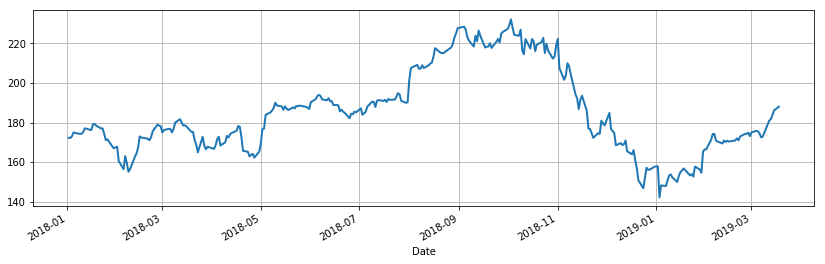

In [23]:
import FinanceDataReader as fdr

# 애플(AAPL)
df = fdr.DataReader('AAPL', '2018-01-01', '2019-03-18')
df['Close'].plot();
df.tail()

In [24]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [25]:
# Initialize the StockDataFrame with the retype function which convert a pandas.DataFrame to a StockDataFrame.
stock = Sdf.retype(df)

In [26]:
df.columns  

Index(['close', 'open', 'high', 'low', 'volume', 'change'], dtype='object')

**stockstats가 적용 시, 원본 데이터의 컬럼명 첫글자가 소문자로 바뀜에 유의할 것(덮어씀)**

---
### 일단 stockstats 라이브러러 깃헙 예제 그대로 돌려보기

In [14]:
stock.get('macd').iloc[:3]

Date
2018-01-02    0.000000
2018-01-03   -0.000673
2018-01-04    0.023950
Name: macd, dtype: float64

In [28]:
# volume delta against previous day
stock['volume_delta'].iloc[:3]

Date
2018-01-02          NaN
2018-01-03    3960000.0
2018-01-04   -7090000.0
Name: volume_delta, dtype: float64

In [33]:
# open delta against next 2 day
stock['open_2_d'].iloc[:3]

Date
2018-01-02   -2.38
2018-01-03   -0.91
2018-01-04   -1.81
Name: open_2_d, dtype: float64

In [34]:
# open price change (in percent) between today and the day before yesterday
# 'r' stands for rate.
stock['open_-2_r'].iloc[:3]

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04    1.398684
Name: open_-2_r, dtype: float64

In [35]:
# volume max of three days ago, yesterday and two days later
stock['volume_-3,2,-1_max'].iloc[:3]

Date
2018-01-02    22430000.0
2018-01-03    25560000.0
2018-01-04    29520000.0
Name: volume_-3,2,-1_max, dtype: float64

In [36]:
# volume min between 3 days ago and tomorrow
stock['volume_-3~1_min'].iloc[:3]

Date
2018-01-02    25560000.0
2018-01-03    22430000.0
2018-01-04    22430000.0
Name: volume_-3~1_min, dtype: float64

In [37]:
# KDJ, default to 9 days
stock['kdjk'].iloc[:3]
#stock['kdjd']
#stock['kdjj']

Date
2018-01-02    66.228070
2018-01-03    62.866603
2018-01-04    65.666582
Name: kdjk, dtype: float64

In [39]:
# 2 days simple moving average on open price 
stock['open_2_sma'].iloc[:3]

Date
2018-01-02    170.160
2018-01-03    171.345
2018-01-04    172.535
Name: open_2_sma, dtype: float64

In [41]:
# MACD
stock['macd'].iloc[:3]

Date
2018-01-02    0.000000
2018-01-03   -0.000673
2018-01-04    0.023950
Name: macd, dtype: float64

In [42]:
# MACD signal line
stock['macds'].iloc[:3]

Date
2018-01-02    0.000000
2018-01-03   -0.000374
2018-01-04    0.009595
Name: macds, dtype: float64

In [43]:
# MACD histogram
stock['macdh'].iloc[:3]

Date
2018-01-02    0.000000
2018-01-03   -0.000598
2018-01-04    0.028711
Name: macdh, dtype: float64

In [30]:
# bolling, including upper band and lower band  : 볼린저 밴드
stock['boll'].iloc[:3]

Date
2018-01-02    172.260000
2018-01-03    172.245000
2018-01-04    172.506667
Name: boll, dtype: float64

In [31]:
stock['boll_ub'].iloc[:3]

Date
2018-01-02           NaN
2018-01-03    172.287426
2018-01-04    173.413603
Name: boll_ub, dtype: float64

In [32]:
stock['boll_lb'].iloc[:3]

Date
2018-01-02           NaN
2018-01-03    172.202574
2018-01-04    171.599730
Name: boll_lb, dtype: float64

In [48]:
# close price less than 10.0 in 5 days count
stock['close_10.0_le_5_c'].iloc[-3:]

Date
2019-03-14    0.0
2019-03-15    0.0
2019-03-18    0.0
Name: close_10.0_le_5_c, dtype: float64

In [47]:
# CR MA2 cross up CR MA1 in 20 days count
stock['cr-ma2_xu_cr-ma1_20_c'].iloc[-3:]

Date
2019-03-14    False
2019-03-15    False
2019-03-18    False
Name: cr-ma2_xu_cr-ma1_20_c, dtype: bool

In [49]:
# 6 days RSI
stock['rsi_6'].iloc[:3]  

# 12 days RSI
# stock['rsi_12']

Date
2018-01-02          NaN
2018-01-03     0.000000
2018-01-04    96.969697
Name: rsi_6, dtype: float64

In [50]:
# CCI, default to 14 days
stock['cci'].iloc[:3]

# 20 days CCI
# stock['cci_20']

/home/ncp/anaconda3/lib/python3.6/site-packages/stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


Date
2018-01-02          NaN
2018-01-03    66.666667
2018-01-04    47.520661
Name: cci, dtype: float64

In [51]:
# TR (true range)
stock['tr'].iloc[:3]
# ATR (Average True Range)
#stock['atr']

/home/ncp/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Date
2018-01-02     NaN
2018-01-03    2.59
2018-01-04    1.39
Name: tr, dtype: float64

In [53]:
# DMA, difference of 10 and 50 moving average
stock['dma'].iloc[-3:]

# DMI
# +DI, default to 14 days
#stock['pdi']

# -DI, default to 14 days
#stock['mdi]

# DX, default to 14 days of +DI and -DI
#stock['dx']

# ADX, 6 days SMA of DX, same as stock['dx_6_ema']
#stock['adx]

# ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']stock['adxr']
#stock['adxr']

Date
2019-03-14    11.7160
2019-03-15    12.2670
2019-03-18    12.5674
Name: dma, dtype: float64

In [54]:
# TRIX, default to 12 days
stock['trix'].iloc[:3]

# MATRIX is the simple moving average of TRIX
#stock['trix_9_sma']

Date
2018-01-02         NaN
2018-01-03   -0.002768
2018-01-04    0.025566
Name: trix, dtype: float64

In [55]:
# VR, default to 26 days
stock['vr'].iloc[-3:]
# MAVR is the simple moving average of VR
#stock['vr_6_sma']

Date
2019-03-14    170.391061
2019-03-15    174.996802
2019-03-18    215.314427
Name: vr, dtype: float64

--- 
### 볼린저밴드 차트 그려보기

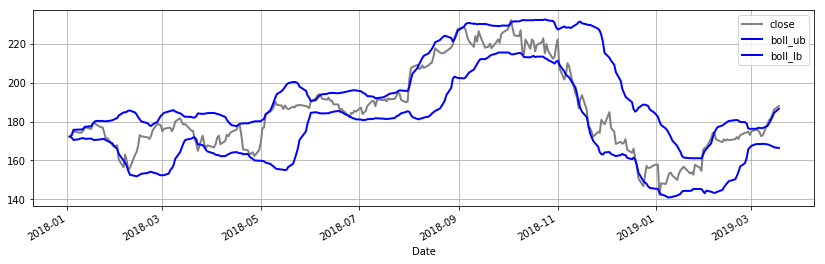

In [65]:
dfs = [df['close'], stock['boll_ub'], stock['boll_lb']]

pd.concat(dfs, axis=1).plot(color=['grey', 'blue', 'blue'])

볼린저밴드로 보아서는, 애플 Sell 타이밍! ㅎ

---
심심하니 볼린저밴드 함수로 만들고 끝내자!!! 

In [67]:
def show_boll(symbol, sd, ed):
    """
    주가 데이터 내리기 > stockstats 데이터로 변환 > 볼린저밴드 구하기 > 차트 그리기
    """
    df = fdr.DataReader(symbol, sd, ed)
    stock = Sdf.retype(df)
    dfs = [df['close'], stock['boll_ub'], stock['boll_lb']]
    pd.concat(dfs, axis=1).plot(color=['grey', 'blue', 'blue'])
    return None

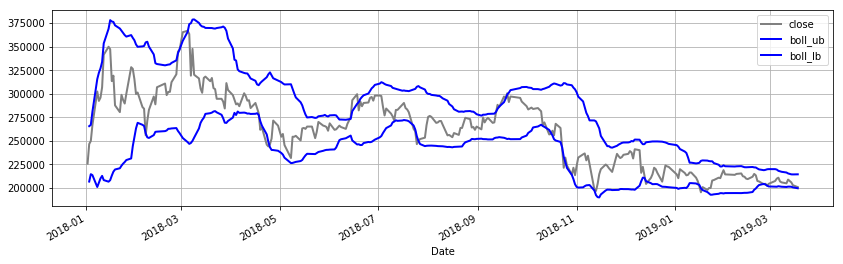

In [68]:
# 셀트리온
show_boll('068270','2018-01-02','2019-03-18')                     

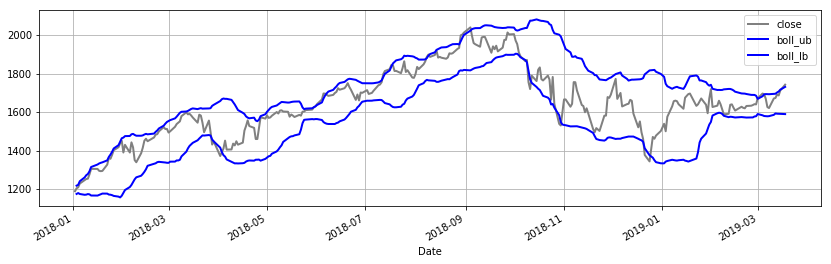

In [69]:
# 아마존
show_boll('AMZN','2018-01-02','2019-03-18')   

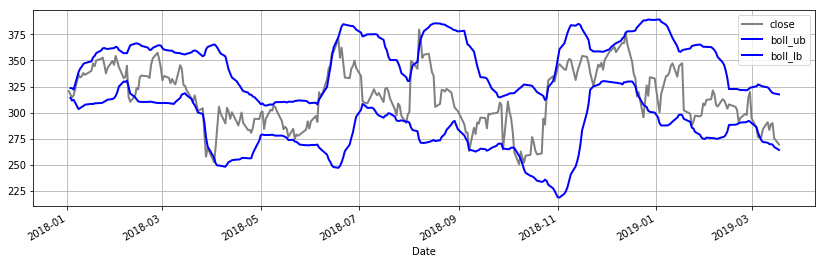

In [70]:
# 테슬라
show_boll('TSLA','2018-01-02','2019-03-18')   

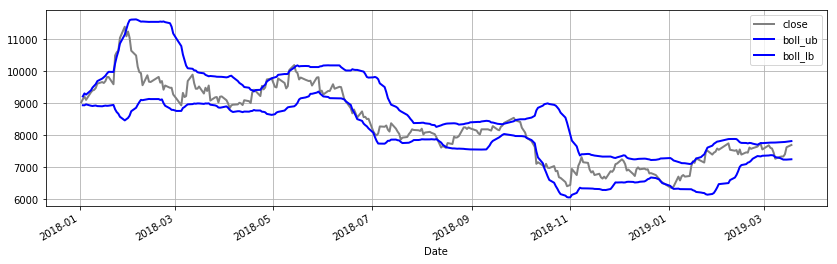

In [71]:
# 미래에셋대우
show_boll('006800','2018-01-02','2019-03-18')   

**매수 시그널 : 테슬라, 셀트리온  
매도 시그널 : 아마존**